In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [144]:
 df = pd.read_csv('C:/Users/laura/Documents/DS/Modul 2/tsa_claims.csv')

In [145]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [146]:
df1 = df.sample(frac=0.25)
df1.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
26643,0203173M,3-Feb-04,12/28/2003 0:00,PHX,Phoenix Sky Harbor International,America West,Property Damage,Checkpoint,Other,$195.56,Approved,$195.56,Approve in Full
51922,2005010372315,14-Dec-04,11/23/2004 0:00,MSY,New Orleans International,Delta Air Lines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full
138255,2009061860318,10-Jun-09,4/26/2009 0:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,GPS - Global Positioning System,$233.43,Denied,$0.00,Deny
161835,2011072185425,6-Jul-11,6/18/2011 20:00,JFK,John F. Kennedy International,Iceland Air,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,$0.00,Deny,NaN,NaN
141999,2009092564038,22-Sep-09,3/14/2009 0:00,ALB,Albany International,Northwest Airlines,Property Damage,Checked Baggage,Locks; Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny


In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 26643 to 193727
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   51067 non-null  object
 1   Date Received  50993 non-null  object
 2   Incident Date  50524 non-null  object
 3   Airport Code   48986 non-null  object
 4   Airport Name   48986 non-null  object
 5   Airline Name   42464 non-null  object
 6   Claim Type     49069 non-null  object
 7   Claim Site     50884 non-null  object
 8   Item           50063 non-null  object
 9   Claim Amount   50026 non-null  object
 10  Status         51066 non-null  object
 11  Close Amount   33791 non-null  object
 12  Disposition    32778 non-null  object
dtypes: object(13)
memory usage: 5.5+ MB


In [148]:
df1.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51067,50993,50524,48986,48986,42464,49069,50884,50063,50026,51066,33791,32778
unique,51067,3529,10744,407,420,250,9,6,1891,13278,14,6144,3
top,2013022001674,21-Apr-04,12/26/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,1,180,45,2390,2342,4355,29515,39914,9145,7128,17218,18031,17231


In [149]:
df2 = df1.replace('-', None)

In [150]:
df2['Date Received'] = pd.to_datetime(df2['Date Received'])
df2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
26643,0203173M,2004-02-03,12/28/2003 0:00,PHX,Phoenix Sky Harbor International,America West,Property Damage,Checkpoint,Other,$195.56,Approved,$195.56,Approve in Full
51922,2005010372315,2004-12-14,11/23/2004 0:00,MSY,New Orleans International,Delta Air Lines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full
138255,2009061860318,2009-06-10,4/26/2009 0:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,GPS - Global Positioning System,$233.43,Denied,$0.00,Deny
161835,2011072185425,2011-07-06,6/18/2011 20:00,JFK,John F. Kennedy International,Iceland Air,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,$0.00,Deny,NaN,NaN
141999,2009092564038,2009-09-22,3/14/2009 0:00,ALB,Albany International,Northwest Airlines,Property Damage,Checked Baggage,Locks; Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny


In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 26643 to 193727
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51067 non-null  object        
 1   Date Received  50993 non-null  datetime64[ns]
 2   Incident Date  50524 non-null  object        
 3   Airport Code   48981 non-null  object        
 4   Airport Name   48981 non-null  object        
 5   Airline Name   42275 non-null  object        
 6   Claim Type     49065 non-null  object        
 7   Claim Site     50884 non-null  object        
 8   Item           50043 non-null  object        
 9   Claim Amount   49968 non-null  object        
 10  Status         51066 non-null  object        
 11  Close Amount   33791 non-null  object        
 12  Disposition    32778 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 5.5+ MB


In [152]:
df2['Incident Date'] = pd.to_datetime(df2['Incident Date'], errors= 'coerce')
df2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
26643,0203173M,2004-02-03,2003-12-28 00:00:00,PHX,Phoenix Sky Harbor International,America West,Property Damage,Checkpoint,Other,$195.56,Approved,$195.56,Approve in Full
51922,2005010372315,2004-12-14,2004-11-23 00:00:00,MSY,New Orleans International,Delta Air Lines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full
138255,2009061860318,2009-06-10,2009-04-26 00:00:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,GPS - Global Positioning System,$233.43,Denied,$0.00,Deny
161835,2011072185425,2011-07-06,2011-06-18 20:00:00,JFK,John F. Kennedy International,Iceland Air,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,$0.00,Deny,NaN,NaN
141999,2009092564038,2009-09-22,2009-03-14 00:00:00,ALB,Albany International,Northwest Airlines,Property Damage,Checked Baggage,Locks; Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny


In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51067 entries, 26643 to 193727
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   51067 non-null  object        
 1   Date Received  50993 non-null  datetime64[ns]
 2   Incident Date  50478 non-null  datetime64[ns]
 3   Airport Code   48981 non-null  object        
 4   Airport Name   48981 non-null  object        
 5   Airline Name   42275 non-null  object        
 6   Claim Type     49065 non-null  object        
 7   Claim Site     50884 non-null  object        
 8   Item           50043 non-null  object        
 9   Claim Amount   49968 non-null  object        
 10  Status         51066 non-null  object        
 11  Close Amount   33791 non-null  object        
 12  Disposition    32778 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 5.5+ MB


In [154]:
df2['Day Diff'] = (df2['Date Received'] - df2['Incident Date']).dt.days
df2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Diff
26643,0203173M,2004-02-03,2003-12-28 00:00:00,PHX,Phoenix Sky Harbor International,America West,Property Damage,Checkpoint,Other,$195.56,Approved,$195.56,Approve in Full,37.0
51922,2005010372315,2004-12-14,2004-11-23 00:00:00,MSY,New Orleans International,Delta Air Lines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,21.0
138255,2009061860318,2009-06-10,2009-04-26 00:00:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,GPS - Global Positioning System,$233.43,Denied,$0.00,Deny,45.0
161835,2011072185425,2011-07-06,2011-06-18 20:00:00,JFK,John F. Kennedy International,Iceland Air,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,$0.00,Deny,NaN,NaN,17.0
141999,2009092564038,2009-09-22,2009-03-14 00:00:00,ALB,Albany International,Northwest Airlines,Property Damage,Checked Baggage,Locks; Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,192.0


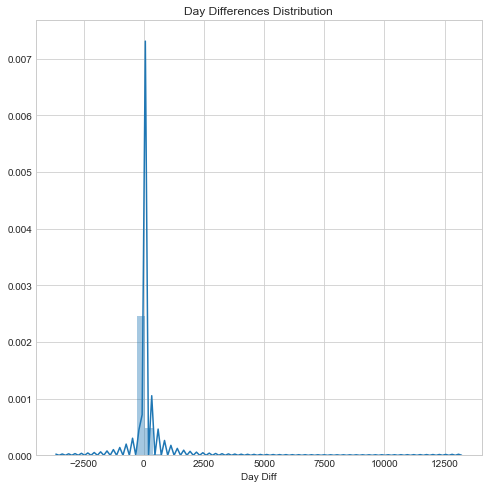

In [155]:
plt.figure(figsize= (8,8))
plt.style.use('seaborn-whitegrid')
plt.title('Day Differences Distribution')
sns.distplot(df2['Day Diff'])

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

Thousand days difference is probably caused by long process from the airport side, or the passenger themselves do not follow up with the process actively, or other factors (such as type of goods; dangerous or not, the claim amount; large or small, etc.) that could make the process longer than necessary. While for differences that are less than 0, it could be caused by passengers who already have insurance before making the trip, or it could be just purely human error when inputting the data.

In [160]:
df2['Claim Amount'] = df2['Claim Amount'].str.replace('$','')
df2['Claim Amount'] = df2['Claim Amount'].str.replace(' ','')
df2['Claim Amount'] = df2['Claim Amount'].str.replace(';',',')
df2['Close Amount'] = df2['Close Amount'].str.replace('$','')
df2['Close Amount'] = df2['Close Amount'].str.replace(';',',')
df2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Diff
26643,0203173M,2004-02-03,2003-12-28 00:00:00,PHX,Phoenix Sky Harbor International,America West,Property Damage,Checkpoint,Other,195.56,Approved,195.56,Approve in Full,37.0
51922,2005010372315,2004-12-14,2004-11-23 00:00:00,MSY,New Orleans International,Delta Air Lines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,40.00,Approved,40.00,Approve in Full,21.0
138255,2009061860318,2009-06-10,2009-04-26 00:00:00,MCO,Orlando International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,GPS - Global Positioning System,233.43,Denied,0.00,Deny,45.0
161835,2011072185425,2011-07-06,2011-06-18 20:00:00,JFK,John F. Kennedy International,Iceland Air,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,0.00,Deny,NaN,NaN,17.0
141999,2009092564038,2009-09-22,2009-03-14 00:00:00,ALB,Albany International,Northwest Airlines,Property Damage,Checked Baggage,Locks; Luggage (all types including footlockers),200.00,Denied,0.00,Deny,192.0


In [161]:
cols = ['Claim Amount', 'Close Amount']
for col in cols:
    df2[col] = pd.to_numeric(df2[col])

ValueError: Unable to parse string "1.981.44" at position 10

Question
Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

Yes, particularly with airlines that have have frequent flight to specific airport as it increases the probability for such cases to happen.

If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

The disposition describes the status of claim being made. Yes, for example, disposition of deny means that the claim is rejected which cause the close amount become 0 and while approve in full means that the claim is approved and passenger can claim the amount that they have claimed. In summary, the disposition relates with the close amount.